In [142]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [143]:
#install imblearn 

!pip install imblearn 

In [144]:
data = pd.read_csv('C:\Users\DBC14 - Mika\Dropbox (DeciBio Consulting)\DeciBio Consulting - Team Files\Content Corp\Conferences\AGBT 2019\Analysis/AGBT Analysis_v15.csv', header=0)
print(data.shape)
print(list(data.columns))

(70, 29)
['Outcome', 'yearoffounded', 'yearoflastfunding', 'cat_early', 'cat_dx', 'cat_tx', 'cat_monitor', 'rounds', 'totalfunding', 'investorcount', 'publicationcount', 'region', 'sub_lung', 'sub_breast', 'sub_crc', 'sub_prost', 'sub_ll', 'sub_pan', 'sub_mel', 'sub_panc', 'sub_other', 'tech_NGS', 'tech_PCR', 'tech_proteomics', 'tech_ia', 'tech_sanger', 'tech_other', 'tech_count', 'products']


In [145]:
data.head()

,Outcome,yearoffounded,yearoflastfunding,cat_early,cat_dx,cat_tx,cat_monitor,rounds,totalfunding,investorcount,...,sub_panc,sub_other,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
0,1,2005,2018.0,0,0,1,0,16,182658644.0,1.0,...,0,0,0,1,1,0,0,0,2,3
1,0,2006,2015.0,0,1,1,0,10,45825885.0,3.0,...,0,0,1,0,0,1,0,0,2,7
2,0,2002,2016.0,1,1,1,1,2,150500000.0,0.0,...,0,0,1,1,0,0,1,0,3,17
3,0,1976,0.0,0,1,1,0,0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,1
4,0,2008,2008.0,1,1,0,0,1,0.0,1.0,...,0,0,0,0,0,1,0,0,1,5


In [29]:
# let's group panel-size e.g., bare-bones <20 genes, actionable 20-50 and comprehensive 50+

# data['diseases']=np.where(data['diseases'] =='Lung,Breast,Colorectal', 'Top 5', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Lung,Breast,Gastric,Other', 'Top 5', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Lung,Breast,Prostate,Colorectal', 'Top 5', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Colorectal,Pan-Cancer', 'Pan-Cancer', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Lung,Colorectal,Gastric,Other', 'Top 5', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Lung,Colorectal,Melanoma,Other', 'Top 5', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Lung,Breast,Prostate,Colorectal,Leukemia/Lymphoma,Gastric,Other', 'Top 5', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Lung,Breast,Colorectal,Gastric,Melanoma,Other,', 'Top 5', data['diseases'])
# data['diseases']=np.where(data['diseases'] =='Lung,Breast,Prostate,Colorectal,Leukemia/Lymphoma', 'Top 5', data['diseases'])

In [66]:
data['Outcome'].value_counts()

#note we did not incl. a few companies e.g, CreatV Microtech etc. as we couldn't find complete info on them

0    56
1    14
Name: Outcome, dtype: int64

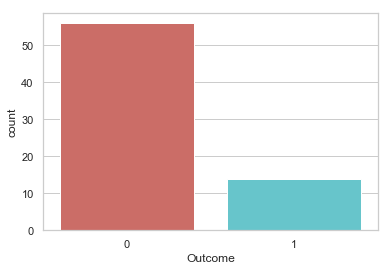

In [67]:
sns.countplot(x='Outcome',
              data=data, palette='hls')
plt.show()

In [58]:
# data exploration - group by outcome_1 and outcome_0 (market share for outcome_1 is greater than 2%)

In [68]:
data.groupby('Outcome').mean()

,ID,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,totalfunding,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
Outcome,,,,,,,,,,,,,,,,,,,,,
0,49.75,2004.821429,0.464286,0.214286,0.553571,0.285714,1.535714,12377.795918,2.196429,8.981309e+07,...,0.160714,2.339286,0.589286,0.339286,0.017857,0.053571,0.035714,0.035714,1.071429,3.071429
1,26.00,1993.000000,0.428571,0.142857,0.571429,0.642857,1.785714,11385.571429,4.000000,4.057189e+08,...,0.142857,2.714286,0.785714,0.428571,0.071429,0.071429,0.000000,0.000000,1.357143,2.857143


In [7]:
# Observations 

# Those w/ >2% market share have an average founded year of 1993, the average number of funding rounds is higher, have more funding, more investors
# # of average investors is significantly higher, # of average publications is higher (572 on average) vs. the 38 on average for non-successes,

# indication count is HIGHER for successes, tech count is higher for successes, while # of products is approximately the same
# category_count is slightly higher for the successes (but not by much), tech_NGS higher on avg, tech_sanger lower w/ successes

In [7]:
data.groupby('tech_NGS').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,...,sub_panc,sub_other,dis_count,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
tech_NGS,,,,,,,,,,,,,,,,,,,,,
0,52.346154,0.115385,1997.269231,0.461538,0.269231,0.346154,0.192308,1.307692,11634.826087,2.692308,...,0.153846,0.192308,1.807692,0.500000,0.038462,0.076923,0.038462,0.076923,0.730769,2.653846
1,40.659091,0.250000,2005.522727,0.454545,0.159091,0.681818,0.454545,1.750000,12457.725000,2.477273,...,0.159091,0.136364,2.772727,0.272727,0.022727,0.045455,0.022727,0.000000,1.363636,3.250000


In [8]:
# Observations
# LBx companies with NGS based panels seems to have more successes, are founded more recently, span more categories, have fewer rounds of funding
## but MORE funding, more investors, more publication, and look at more indications (on avg.)

In [9]:
data.groupby('tech_PCR').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,...,sub_panc,sub_other,dis_count,tech_NGS,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
tech_PCR,,,,,,,,,,,,,,,,,,,,,
0,44.355556,0.177778,2004.733333,0.511111,0.177778,0.511111,0.355556,1.555556,13474.65000,2.177778,...,0.111111,0.20,2.266667,0.711111,0.00,0.088889,0.00,0.044444,0.844444,2.444444
1,46.160000,0.240000,1998.360000,0.360000,0.240000,0.640000,0.360000,1.640000,9866.26087,3.240000,...,0.240000,0.08,2.680000,0.480000,0.08,0.000000,0.08,0.000000,1.640000,4.080000


In [ ]:
#Observations - PCR
## on average, are founded earlier (1998 v. 2004 for non-PCR), tend to have MORE products on average

In [10]:
data.groupby('sub_lung').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
sub_lung,,,,,,,,,,,,,,,,,,,,,
0,52.354839,0.161290,2001.193548,0.612903,0.161290,0.322581,0.258065,1.387097,13630.653846,1.903226,...,0.354839,1.193548,0.483871,0.225806,0.032258,0.064516,0.032258,0.032258,0.870968,1.677419
1,39.153846,0.230769,2003.461538,0.333333,0.230769,0.743590,0.435897,1.743590,11121.972973,3.076923,...,0.000000,3.384615,0.743590,0.461538,0.025641,0.051282,0.025641,0.025641,1.333333,4.102564


In [11]:
data.groupby('sub_pan').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
sub_pan,,,,,,,,,,,,,,,,,,,,,
0,43.085106,0.234043,1999.063830,0.468085,0.212766,0.489362,0.361702,1.553191,13916.575000,2.510638,...,0.234043,2.404255,0.510638,0.404255,0.021277,0.042553,0.042553,0.042553,1.06383,2.808511
1,48.913043,0.130435,2009.391304,0.434783,0.173913,0.695652,0.347826,1.652174,9097.695652,2.652174,...,0.000000,2.434783,0.869565,0.260870,0.043478,0.086957,0.000000,0.000000,1.26087,3.478261


In [12]:
data.groupby('sub_other').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,...,sub_panc,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
sub_other,,,,,,,,,,,,,,,,,,,,,
0,42.542373,0.203390,2003.796610,0.423729,0.220339,0.627119,0.372881,1.661017,11470.660714,2.762712,...,0.169492,2.661017,0.644068,0.389831,0.033898,0.067797,0.016949,0.033898,1.186441,3.40678
1,58.181818,0.181818,1995.272727,0.636364,0.090909,0.181818,0.272727,1.181818,17650.428571,1.454545,...,0.090909,1.090909,0.545455,0.181818,0.000000,0.000000,0.090909,0.000000,0.818182,1.00000


In [13]:
#Observations - lung focused companies vs. "other' focused companies
## lung tends to be more successful, founded later, more rounds of funding, higher investor and pub count, more NGS, more PCR, less proteomics, less immuno assay, less sanger, and less other
## tends to have MORE techs, and higher avg product count
## other focused companies tend to have less success, are founded earlier (1995 v. 2003), fewer rounds of funding, fewer products

# pan-cancer focused companies tend to have LESS success, are founded much more recently (on avg. 2009 vs. 1999 for non-pan focused), they tend to have LESS total funding, FEWER publications, and incorporate a GREATER number of technologies (1.3 v. 1.1) 

In [ ]:
## BY CLIN. APPLICATION

In [13]:
data.groupby('cat_early').mean()

,ID,Outcome,yearoffounded,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,totalfunding,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
cat_early,,,,,,,,,,,,,,,,,,,,,
0,38.289474,0.210526,2003.368421,0.184211,0.684211,0.394737,1.289474,10265.315789,3.236842,1.870694e+08,...,0.105263,2.631579,0.631579,0.421053,0.026316,0.026316,0.026316,0.0000,1.131579,3.263158
1,52.968750,0.187500,2001.375000,0.218750,0.406250,0.312500,1.937500,15033.120000,1.750000,1.148800e+08,...,0.218750,2.156250,0.625000,0.281250,0.031250,0.093750,0.031250,0.0625,1.125000,2.750000


In [ ]:
#seems strange that the early would be founded a bit earlier (2001 vs. 2003), let's see why
## filter for the early companies w/ year of founding less than or equal to 2001

In [14]:
early_cos_2001 = data[(data['cat_early'] == 1) & (data['yearoffounded'] <=2001)]

early_cos_2001

,ID,companyname,companyname_CB,Outcome,yearoffounded,employeecount,yearoflastfunding,categorylist,cat_early,cat_dx,...,dis_count,tech_approach,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
5,55,Epigenomics,Epigenomics AG,0,1998,51 to 100,2015,"Diagnosis,n/a,Early Detection / Screening",1,1,...,2,"RT-PCR,n/a",0,1,0,0,0,0,1,3
14,11,Thermo Fisher,Thermo Fisher Scientific,1,1956,10000+,0,"Early Detection,Monitoring",1,0,...,3,"RT-PCR,dPCR,NGS",1,1,0,0,0,0,2,2
15,25,Datar Cancer Genetics,Datar Genetics,0,1992,51 to 100,2014,"therapy Selection,Monitoring,Early Detection",1,0,...,4,NGS,1,0,0,0,0,0,1,2
22,44,Angle plc,Angle plc,0,1994,51 to 100,2015,Early Detection,1,0,...,1,NaN,0,0,0,0,0,0,0,1
30,7,Qiagen,Qiagen,1,1986,3855,0-Jan,"Monitoring,Biomarker Discovery,Screening,Trans...",1,0,...,4,"RT-PCR,NGS,PCR",1,1,0,0,0,0,2,4
53,14,Caris,Caris Life Sciences,0,1996,1001 to 5000,2018,"Biomarker Discovery,therapy Selection,Screening",1,0,...,1,Other - aptamers,0,0,0,0,0,1,1,1
65,87,Shimadzu,NaN,0,1875,10000+,0,Early Detection,1,0,...,1,NaN,0,0,0,0,0,0,0,1
66,88,Hitachi,NaN,0,1959,10000+,0,Early Detection,1,0,...,1,NaN,0,0,0,0,0,0,0,1


In [15]:
early_cos = data[(data['cat_early'] == 1)]
early_cos

,ID,companyname,companyname_CB,Outcome,yearoffounded,employeecount,yearoflastfunding,categorylist,cat_early,cat_dx,...,dis_count,tech_approach,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
2,24,NeoGenomics Laboratories,NeoGenomics Laboratories,0,2002,501 to 1000,2016,"Monitoring,therapy Selection,Risk Assessment,S...",1,1,...,5,"NGS,Sanger sequencing,RT-PCR,PCR,RT-qPCR",1,1,0,0,1,0,3,17
4,29,OTraces,OTraces,0,2008,1 to 10,2008,"Risk Stratification,Early Detection,Diagnosis",1,1,...,3,Immunoassay,0,0,0,1,0,0,1,5
5,55,Epigenomics,Epigenomics AG,0,1998,51 to 100,2015,"Diagnosis,n/a,Early Detection / Screening",1,1,...,2,"RT-PCR,n/a",0,1,0,0,0,0,1,3
9,64,MDNA Life Sciences,MDNA Life Sciences,0,2014,unknown,0,"Early Detection / Screening,Early Detection,Di...",1,1,...,1,RT-PCR,0,1,0,0,0,0,1,3
10,68,Oncocyte,Oncocyte,0,2009,11 to 50,0,"n/a,Diagnosis,Early Detection / Screening",1,1,...,4,"n/a,NGS,Microarray",1,0,0,0,0,0,1,4
11,5,OncoDNA,OncoDNA,0,2012,11 to 50,2016,"therapy Selection,Screening,Monitoring,Diagnosis",1,1,...,4,"NGS,IHC,Phospho-IHC,N/A",1,0,0,0,0,0,1,4
14,11,Thermo Fisher,Thermo Fisher Scientific,1,1956,10000+,0,"Early Detection,Monitoring",1,0,...,3,"RT-PCR,dPCR,NGS",1,1,0,0,0,0,2,2
15,25,Datar Cancer Genetics,Datar Genetics,0,1992,51 to 100,2014,"therapy Selection,Monitoring,Early Detection",1,0,...,4,NGS,1,0,0,0,0,0,1,2
16,37,Apostle,Apostle Inc,0,2017,unknown,2017,Early Detection,1,0,...,1,Magnetic nanoparticles,0,0,0,0,0,0,0,3
17,4,Guardant,Guardant Health,1,2012,51 to 100,2018,"Early Detection,therapy Selection,Minimal resi...",1,0,...,4,NGS,1,0,0,0,0,0,1,4


In [16]:
grail = data[(data['companyname'] == 'Grail')]

In [17]:
grail['totalfunding']

20    1.611655e+09
Name: totalfunding, dtype: float64

In [18]:
#the best way to do this would be to only count the private companies, but that's another layer so fine for this analysis

In [19]:
#ah so Hitatchi and Shimadzu are bringing the average down -- though they just recently began exploring LBx early; something to note in the analysis
## the interesting piece is that given the risk associated w/ early detection (& $$$ req'd for validation), only more est. companies can take that bet 

In [20]:
data.groupby('cat_dx').mean()

,ID,Outcome,yearoffounded,cat_early,cat_tx,cat_monitor,category_count,rank,rounds,totalfunding,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
cat_dx,,,,,,,,,,,,,,,,,,,,,
0,46.303571,0.214286,2002.589286,0.446429,0.571429,0.357143,1.392857,10989.836735,2.535714,1.886039e+08,...,0.178571,2.410714,0.660714,0.339286,0.035714,0.017857,0.000000,0.035714,1.089286,2.714286
1,39.785714,0.142857,2001.928571,0.500000,0.500000,0.357143,2.357143,16243.428571,2.642857,3.172499e+07,...,0.071429,2.428571,0.500000,0.428571,0.000000,0.214286,0.142857,0.000000,1.285714,4.285714


In [21]:
data.groupby('cat_tx').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_monitor,category_count,rank,rounds,totalfunding,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
cat_tx,,,,,,,,,,,,,,,,,,,,,
0,53.161290,0.193548,1999.129032,0.612903,0.225806,0.354839,1.225806,18595.230769,1.709677,8.561143e+07,...,0.290323,1.516129,0.451613,0.290323,0.000000,0.032258,0.032258,0.032258,0.838710,1.709677
1,38.512821,0.205128,2005.102564,0.333333,0.179487,0.358974,1.871795,7633.351351,3.230769,2.094060e+08,...,0.051282,3.128205,0.769231,0.410256,0.051282,0.076923,0.025641,0.025641,1.358974,4.076923


In [22]:
### this goes along w/ the above hypothesis that more est. companies can take on greater risk & conversely, that younger companies
## have to go for the 'surer' path which is, currently, therapy selection in LBx 

In [23]:
data.groupby('cat_monitor').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,category_count,rank,rounds,totalfunding,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
cat_monitor,,,,,,,,,,,,,,,,,,,,,
0,51.80,0.111111,2003.80,0.488889,0.2,0.555556,1.266667,12531.153846,2.488889,1.269037e+08,...,0.177778,2.2,0.533333,0.355556,0.022222,0.066667,0.00,0.044444,1.022222,2.777778
1,32.76,0.360000,2000.04,0.400000,0.2,0.560000,2.160000,11549.791667,2.680000,2.076375e+08,...,0.120000,2.8,0.800000,0.360000,0.040000,0.040000,0.08,0.000000,1.320000,3.480000


In [24]:
data.groupby('region').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
region,,,,,,,,,,,,,,,,,,,,,
APAC,60.000000,0.062500,1998.000000,0.312500,0.125000,0.625000,0.375000,1.437500,7187.571429,1.750000,...,0.125000,2.812500,0.562500,0.375000,0.000000,0.062500,0.000000,0.062500,1.062500,4.375000
EU-Other,17.200000,0.400000,1982.400000,0.400000,0.200000,1.000000,0.600000,2.200000,8442.600000,3.000000,...,0.200000,3.600000,0.800000,0.600000,0.000000,0.000000,0.000000,0.000000,1.400000,3.200000
EU5,44.400000,0.200000,1999.200000,0.400000,0.200000,0.400000,0.400000,1.400000,19124.600000,1.600000,...,0.200000,2.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.400000,2.200000
Other,89.000000,0.000000,2012.000000,1.000000,0.000000,1.000000,0.000000,2.000000,NaN,1.000000,...,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
USA,41.697674,0.232558,2006.604651,0.511628,0.232558,0.488372,0.325581,1.581395,13524.307692,2.953488,...,0.162791,2.093023,0.674419,0.325581,0.046512,0.069767,0.046512,0.023256,1.186047,2.651163


In [25]:
# Observations when split by HQ
# EU-Other is closer to 'success' outcome (mainly, Switzerland and Netherlands)

In [26]:
data.groupby('categorylist').mean()

,ID,Outcome,yearoffounded,cat_early,cat_dx,cat_tx,cat_monitor,category_count,rank,rounds,...,sub_other,dis_count,tech_NGS,tech_PCR,tech_proteomics,tech_ia,tech_sanger,tech_other,tech_count,products
categorylist,,,,,,,,,,,,,,,,,,,,,
"Biomarker Discovery,therapy Selection,Screening",14.000000,0.000000,1996.000000,1.0,0.0,1.0,0.0,2.0,708.000000,1.00,...,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.000000,1.000
Diagnosis,16.000000,0.000000,1979.000000,0.0,1.0,0.0,0.0,1.0,17855.000000,1.50,...,0.000000,1.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.500000,1.000
"Diagnosis,Monitoring",34.000000,0.000000,2011.000000,0.0,1.0,0.0,1.0,2.0,4669.000000,3.00,...,1.000000,1.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,2.000000,1.000
"Diagnosis,n/a,Early Detection / Screening",55.000000,0.000000,1998.000000,1.0,1.0,0.0,0.0,2.0,3714.000000,5.00,...,0.000000,2.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,3.000
"Diagnosis,therapy Selection",16.000000,0.000000,1976.000000,0.0,1.0,1.0,0.0,2.0,22987.000000,0.00,...,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000
Early Detection,71.200000,0.100000,1993.200000,1.0,0.0,0.0,0.0,1.0,13920.166667,1.10,...,0.600000,1.200000,0.400000,0.100000,0.0,0.0,0.0,0.1,0.600000,1.200
Early Detection / Screening,48.666667,0.333333,2011.333333,1.0,0.0,0.0,0.0,1.0,18171.333333,2.00,...,0.000000,1.333333,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000
"Early Detection / Screening,Early Detection,Differential Diagnosis",64.000000,0.000000,2014.000000,1.0,1.0,0.0,0.0,2.0,54816.000000,0.00,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,3.000
"Early Detection / Screening,n/a,Therapy Selection / Tumor Profiling",89.000000,0.000000,2012.000000,1.0,0.0,1.0,0.0,2.0,NaN,1.00,...,0.000000,5.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,2.000000,1.000


Text(0,0.5,'Success')

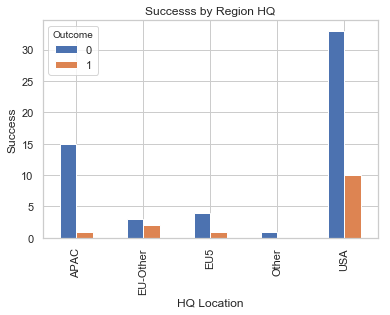

In [27]:
# Success by Region

%matplotlib inline
pd.crosstab(data.region,data.Outcome).plot(kind='bar')
plt.title('Successs by Region HQ')
plt.xlabel('HQ Location')
plt.ylabel('Success')

Text(0,0.5,'Success')

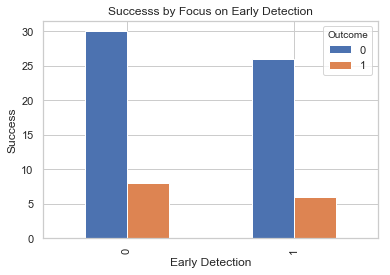

In [28]:
# Success by Application - early

%matplotlib inline
pd.crosstab(data.cat_early,data.Outcome).plot(kind='bar')
plt.title('Successs by Focus on Early Detection')
plt.xlabel('Early Detection')
plt.ylabel('Success')

Text(0,0.5,'Success')

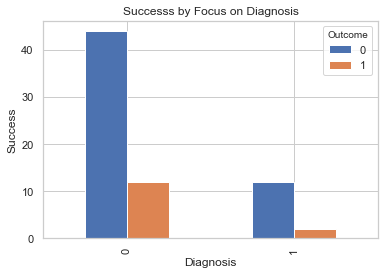

In [29]:
# Success by Application - dx

%matplotlib inline
pd.crosstab(data.cat_dx,data.Outcome).plot(kind='bar')
plt.title('Successs by Focus on Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Success')

Text(0,0.5,'Success')

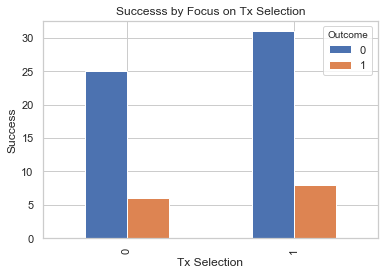

In [30]:
# Success by Application

%matplotlib inline
pd.crosstab(data.cat_tx,data.Outcome).plot(kind='bar')
plt.title('Successs by Focus on Tx Selection')
plt.xlabel('Tx Selection')
plt.ylabel('Success')

Text(0,0.5,'Success')

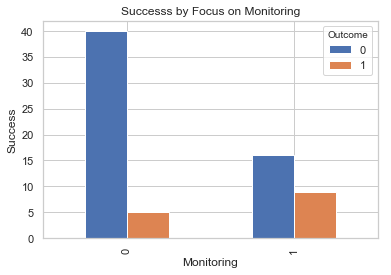

In [31]:
# Success by Application

%matplotlib inline
pd.crosstab(data.cat_monitor,data.Outcome).plot(kind='bar')
plt.title('Successs by Focus on Monitoring')
plt.xlabel('Monitoring')
plt.ylabel('Success')

Text(0,0.5,'Success')

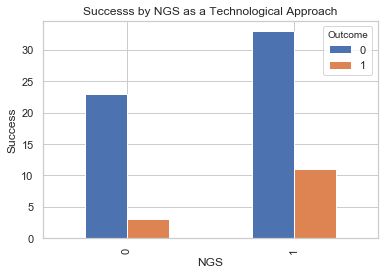

In [32]:
# Success by Tech - NGS

%matplotlib inline
pd.crosstab(data.tech_NGS,data.Outcome).plot(kind='bar')
plt.title('Successs by NGS as a Technological Approach')
plt.xlabel('NGS')
plt.ylabel('Success')

Text(0,0.5,'Success')

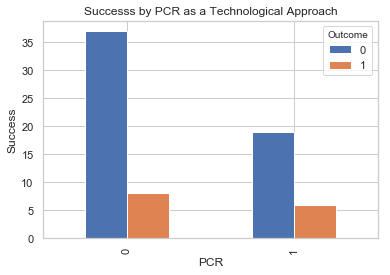

In [33]:
# Success by Tech - PCR

%matplotlib inline
pd.crosstab(data.tech_PCR,data.Outcome).plot(kind='bar')
plt.title('Successs by PCR as a Technological Approach')
plt.xlabel('PCR')
plt.ylabel('Success')

Text(0,0.5,'Success')

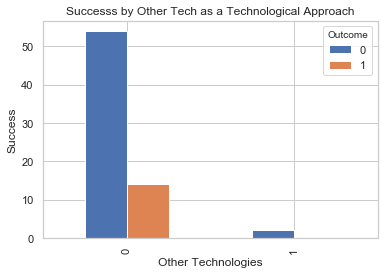

In [34]:
# Success by Tech - Other

%matplotlib inline
pd.crosstab(data.tech_other,data.Outcome).plot(kind='bar')
plt.title('Successs by Other Tech as a Technological Approach')
plt.xlabel('Other Technologies')
plt.ylabel('Success')

Text(0,0.5,'Success')

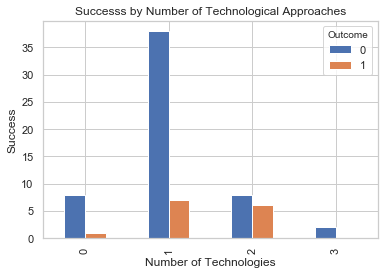

In [35]:
# Success by Tech Count

%matplotlib inline
pd.crosstab(data.tech_count,data.Outcome).plot(kind='bar')
plt.title('Successs by Number of Technological Approaches')
plt.xlabel('Number of Technologies')
plt.ylabel('Success')

Text(0,0.5,'Success')

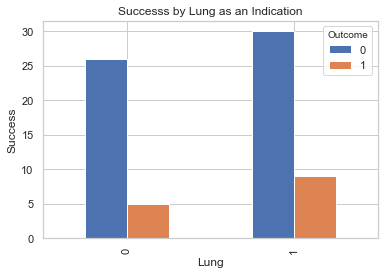

In [36]:
# Success by Indication - Lung

%matplotlib inline
pd.crosstab(data.sub_lung,data.Outcome).plot(kind='bar')
plt.title('Successs by Lung as an Indication')
plt.xlabel('Lung')
plt.ylabel('Success')

Text(0,0.5,'Success')

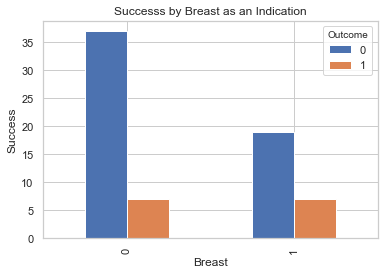

In [37]:
# Success by Indication - Breast

%matplotlib inline
pd.crosstab(data.sub_breast,data.Outcome).plot(kind='bar')
plt.title('Successs by Breast as an Indication')
plt.xlabel('Breast')
plt.ylabel('Success')

Text(0,0.5,'Success')

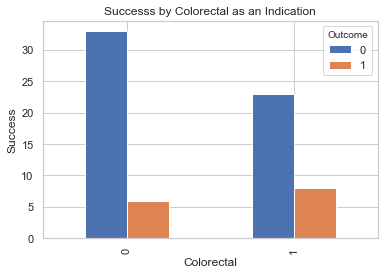

In [38]:
# Success by Indication - CRC

%matplotlib inline
pd.crosstab(data.sub_crc,data.Outcome).plot(kind='bar')
plt.title('Successs by Colorectal as an Indication')
plt.xlabel('Colorectal')
plt.ylabel('Success')

Text(0,0.5,'Success')

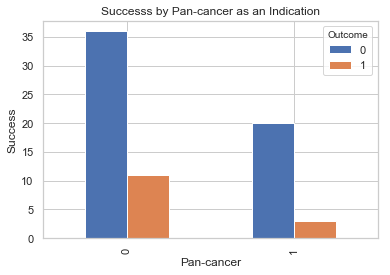

In [39]:
# Success by Indication - Pan-Cancer

%matplotlib inline
pd.crosstab(data.sub_pan,data.Outcome).plot(kind='bar')
plt.title('Successs by Pan-cancer as an Indication')
plt.xlabel('Pan-cancer')
plt.ylabel('Success')

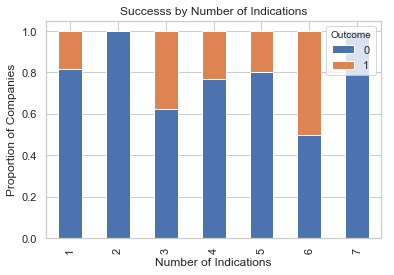

In [40]:
# Success by Indication Count

table=pd.crosstab(data.dis_count,data.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Successs by Number of Indications')
plt.xlabel('Number of Indications')
plt.ylabel('Proportion of Companies')
plt.show()

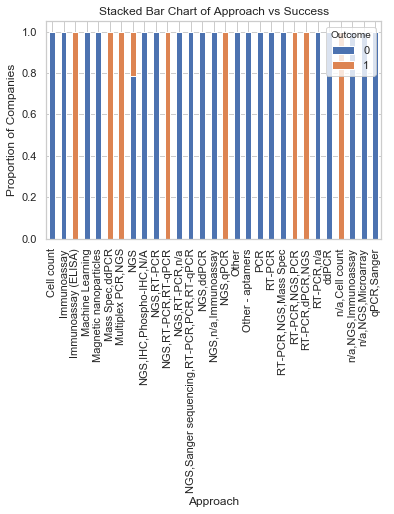

In [41]:
table=pd.crosstab(data.tech_approach,data.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Approach vs Success')
plt.xlabel('Approach')
plt.ylabel('Proportion of Companies')
plt.show()
#plt.savefig('tech_vs_success')

#let's clean up tech & re run.. too many to really draw conclusions - should be NGS, PCR, Microarray, Mass Spec, Immunoassay, Other
# may be a good indicator of outcome, once we clean

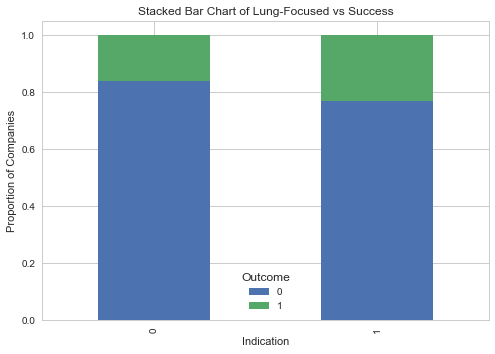

In [108]:
table=pd.crosstab(data.sub_lung,data.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Lung-Focused vs Success')
plt.xlabel('Indication')
plt.ylabel('Proportion of Companies')
# plt.savefig('indication_vs_success')
plt.show()

#clean the data further - let's break lung out (if it has lung, put it in lung; then Breast, Colorectal, Prostate, then Pan-Cancer, L/L and other)
# may be a good indicator of outcome, once we clean

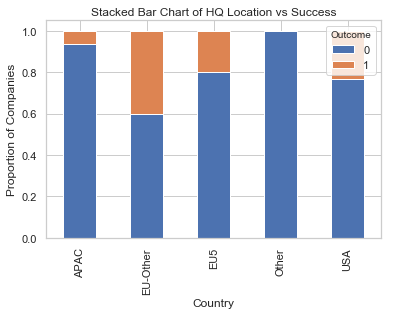

In [42]:
table=pd.crosstab(data.region,data.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of HQ Location vs Success')
plt.xlabel('Country')
plt.ylabel('Proportion of Companies')
#plt.savefig('location_vs_success')
plt.show()

#location seems to be a good predictor of the outcome variable

In [73]:
# let's look at funding trends 

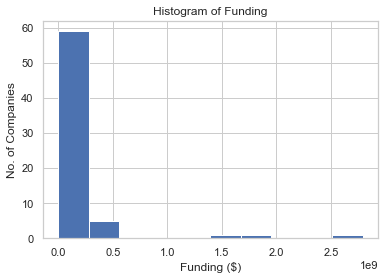

In [43]:
data.totalfunding.hist()
plt.title('Histogram of Funding')
plt.xlabel('Funding ($)')
plt.ylabel('No. of Companies')
plt.savefig('hist_funding')

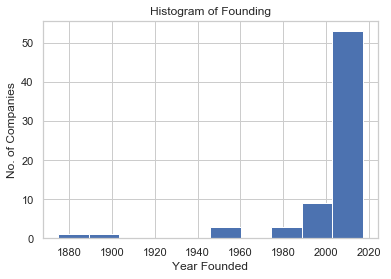

In [44]:
data.yearoffounded.hist()
plt.title('Histogram of Founding')
plt.xlabel('Year Founded')
plt.ylabel('No. of Companies')
plt.savefig('hist_founding')

# damn Roche is old!
# most companies are young i.e., founded in past 10 years 

In [ ]:
## Create dummy variables

# here are the variables
## 'ID', 'companyname', 'companyname_CB', 'Outcome', 'yearoffounded', 'employeecount', 'yearoflastfunding', 'categorylist', 'cat_early', 'cat_dx', 'cat_tx', 'cat_monitor', 'category_count', 'rank', 'rounds', 'totalfunding', 'investorcount', 'avgteamrank', 'publicationcount', 'timesincefoundingpercentile', 'totalfundingpercentile', 'timesincelastfundingpercentile', 'valuationpercentile', 'investorcountpercentile', 'avgteamrankpercentile', 'avgemployeecountpercentile', 'publicationcountpercentile', 'status', 'shortdescription', 'country', 'region', 'diseases', 'sub_lung', 'sub_breast', 'sub_crc', 'sub_prost', 'sub_ll', 'sub_pan', 'sub_mel', 'sub_panc', 'sub_other', 'dis_count', 'tech_approach', 'tech_NGS', 'tech_PCR', 'tech_proteomics', 'tech_ia', 'tech_sanger', 'tech_other', 'tech_count', 'products'

In [146]:
#pull just the categorical variables 

cat_vars=['region']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['region']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [147]:
#final columns to keep 

data_final=data[to_keep]
data_final = data_final.dropna()
data_final.columns.values

array(['Outcome', 'yearoffounded', 'yearoflastfunding', 'cat_early',
       'cat_dx', 'cat_tx', 'cat_monitor', 'rounds', 'totalfunding',
       'investorcount', 'publicationcount', 'sub_lung', 'sub_breast',
       'sub_crc', 'sub_prost', 'sub_ll', 'sub_pan', 'sub_mel', 'sub_panc',
       'sub_other', 'tech_NGS', 'tech_PCR', 'tech_proteomics', 'tech_ia',
       'tech_sanger', 'tech_other', 'tech_count', 'products',
       'region_APAC', 'region_EU-Other', 'region_EU5', 'region_Other',
       'region_USA'], dtype=object)

In [148]:
#apply SMOTE (Synthetic Minority Oversampling Technique) in order to balance our dataset
## Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
## Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

X = data_final.loc[:, data_final.columns != 'Outcome']
y = data_final.loc[:, data_final.columns == 'Outcome']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no success in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of success",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of no success data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of success data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

('length of oversampled data is ', 66)
('Number of no success in oversampled data', 33)
('Number of success', 33)
('Proportion of no success data in oversampled data is ', 0)
('Proportion of success data in oversampled data is ', 0)


In [149]:
#Apply recursive feature elimination - The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

data_final_vars=data_final.columns.values.tolist()
y=['Outcome']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True False False False False False False  True False
  True  True  True  True False False False  True]
[ 1  1  1  1  1  1  1  1  1  1  3  1  4  1  1  1 11  9 12  5  6  2  1  8
  1  1  1  1  7 10 13  1]


In [197]:
#adjust this to the columns that RFE selects

cols=['yearoffounded', 'cat_early',
       'cat_dx', 'cat_tx', 'cat_monitor', 'publicationcount', 'sub_breast',
      'sub_prost', 'sub_ll', 'sub_pan', 'tech_ia', 'tech_other', 'products', 'region_USA' ] 

#cols=['yearoffounded', 'yearoflastfunding', 'cat_early',
      # 'cat_dx', 'cat_tx', 'cat_monitor', 'rounds', 'totalfunding',
      # 'investorcount', 'publicationcount', 'sub_breast',
       # 'sub_prost', 'sub_ll', 'sub_pan', 'tech_ia',
        #'tech_other', 'tech_count', 'products',
       # 'region_APAC', 'region_USA'] 
    
# couldn't incl. some of the cats since we got a SINGULAR MATRIX error (not able to calc the inverse)
    
X=os_data_X[cols]
y=os_data_y['Outcome']

In [198]:
## now can implement the model 

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.293688
         Iterations: 35
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.576     
Dependent Variable:     Outcome              AIC:                  66.7669   
Date:                   2019-02-22 11:14     BIC:                  97.4220   
No. Observations:       66                   Log-Likelihood:       -19.383   
Df Model:               13                   LL-Null:              -45.748   
Df Residuals:           52                   LLR p-value:          1.0074e-06
Converged:              0.0000               Scale:                1.0000    
No. Iterations:         35.0000                                              
-----------------------------------------------------------------------------
                  Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
-----------------------------------------------------------------------------
yearoffounded     -0.0052     

C:\Users\DBC14 - Mika\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [199]:
# may want to remove the variables w/ a p value > .05
## that would be, all except year of founded, publication count, region_USA

cols=['yearoffounded', 'publicationcount', 'region_USA'] 
X=os_data_X[cols]
y=os_data_y['Outcome']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.422084
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.391     
Dependent Variable: Outcome          AIC:              61.7151   
Date:               2019-02-22 11:18 BIC:              68.2841   
No. Observations:   66               Log-Likelihood:   -27.858   
Df Model:           2                LL-Null:          -45.748   
Df Residuals:       63               LLR p-value:      1.6998e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
yearoffounded     -0.0020   0.0009 -2.1368 0.0326 -0.0038 -0.0002
publicationcount   0.0104   0.0040  2.5918 0.0095  0.0025  0.0183


In [200]:
## now fit the logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
## predict the test set results and calc the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [202]:
# run a confusion matrix to see sensitivity / specificity (FP and FN rates)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 1]
 [3 7]]


In [203]:
## compute precision, recall etc. 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

   micro avg       0.80      0.80      0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



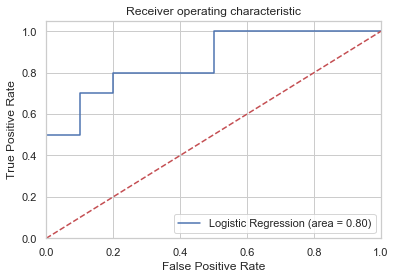

In [204]:
## calc the ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
Done!